In [1]:
# Imporitng Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# State Wise Major Crop Production data
df   = pd.read_csv(r"C:\Users\Dell\Downloads\crop_production.csv")

In [3]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df.isnull().sum()  # there are 3730 null values present in the production column, hence imputing it with the mean of the data 

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [5]:
#df["Production"].fillna(df["Production"].mean(), inplace =True)
df.dropna(inplace=True)

In [6]:
df = df[df['Production'] !=0]
#df["Yield"] = df["Production"]/df["Area"]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238838 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     238838 non-null  object 
 1   District_Name  238838 non-null  object 
 2   Crop_Year      238838 non-null  int64  
 3   Season         238838 non-null  object 
 4   Crop           238838 non-null  object 
 5   Area           238838 non-null  float64
 6   Production     238838 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.6+ MB


In [8]:
df.describe()

,Crop_Year,Area,Production
count,238838.000000,2.388380e+05,2.388380e+05
mean,2005.676178,1.234239e+04,5.910957e+05
std,4.975472,5.120969e+04,1.719107e+07
min,1997.000000,1.000000e-01,1.000000e-02
25%,2002.000000,9.100000e+01,9.900000e+01
50%,2006.000000,6.340550e+02,7.840000e+02
75%,2010.000000,4.700000e+03,7.306270e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [17]:
df["State_Name"].unique()  #Unique values present in the state name column. 

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

# EDA for df

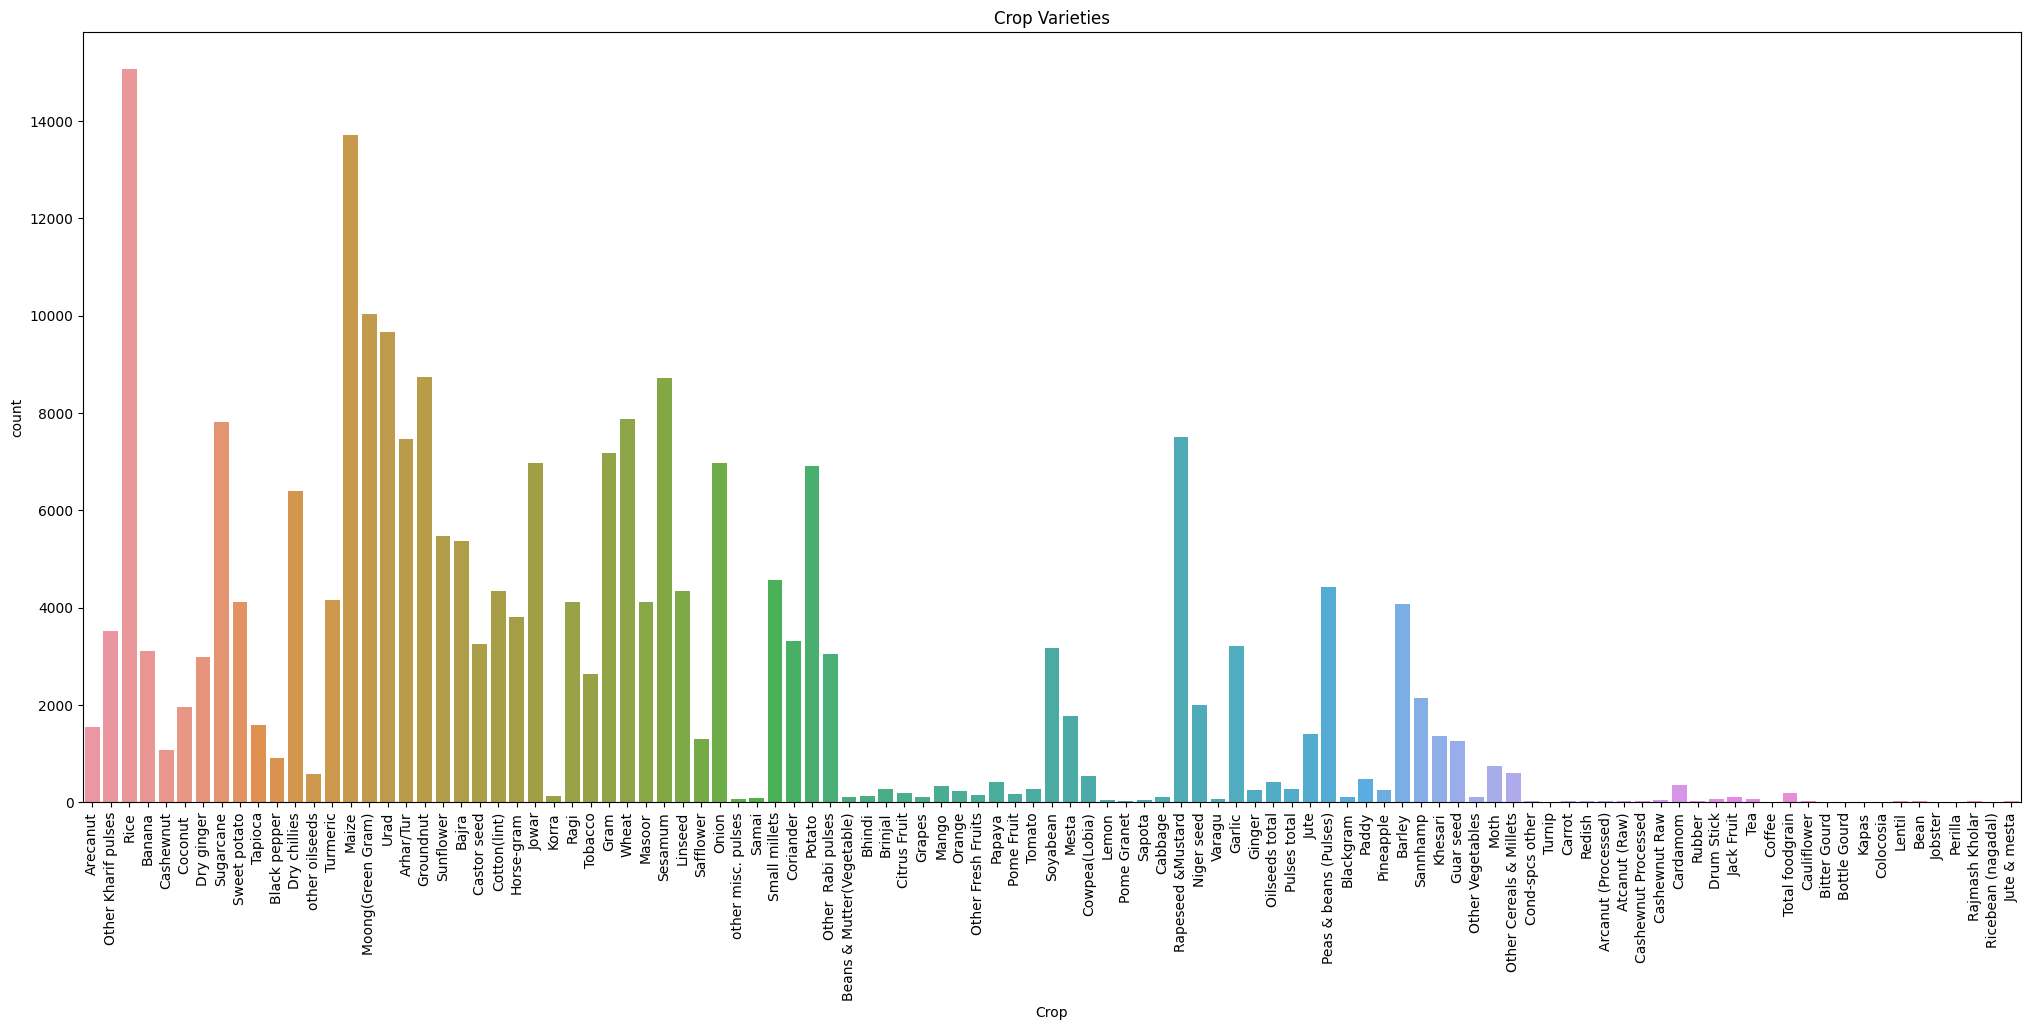

In [20]:
# Plotting th bar graph to check the count of each crops grown in india.
plt.figure(figsize=(25,10))
sns.countplot(x=df['Crop'],data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Crop')
plt.ylabel('count')
plt.title('Crop Varieties')
plt.show()

In [84]:
df['Crop'].value_counts().reset_index()

,index,Crop
0,Rice,15078
1,Maize,13723
2,Moong(Green Gram),10037
3,Urad,9669
4,Groundnut,8732
...,...,...
100,Ricebean (nagadal),10
101,Jobster,9
102,Perilla,9
103,Coffee,6


From the above plot we can see that RICE and MAIZE are largly grown in india 

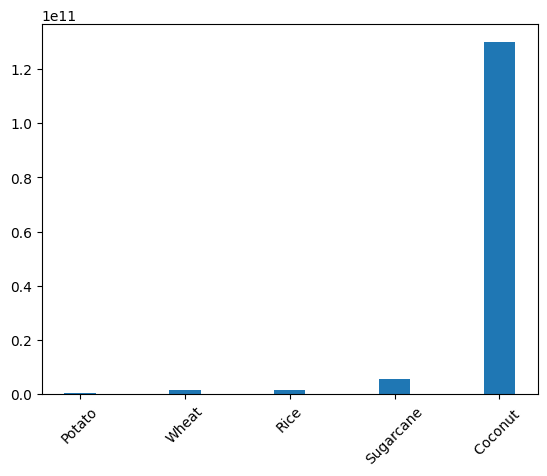

In [22]:
# checking for the production of crops 
cr = df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production')
plt.bar(cr.tail()["Crop"], cr.tail()["Production"], width = 0.3)
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot: xlabel='Season', ylabel='count'>

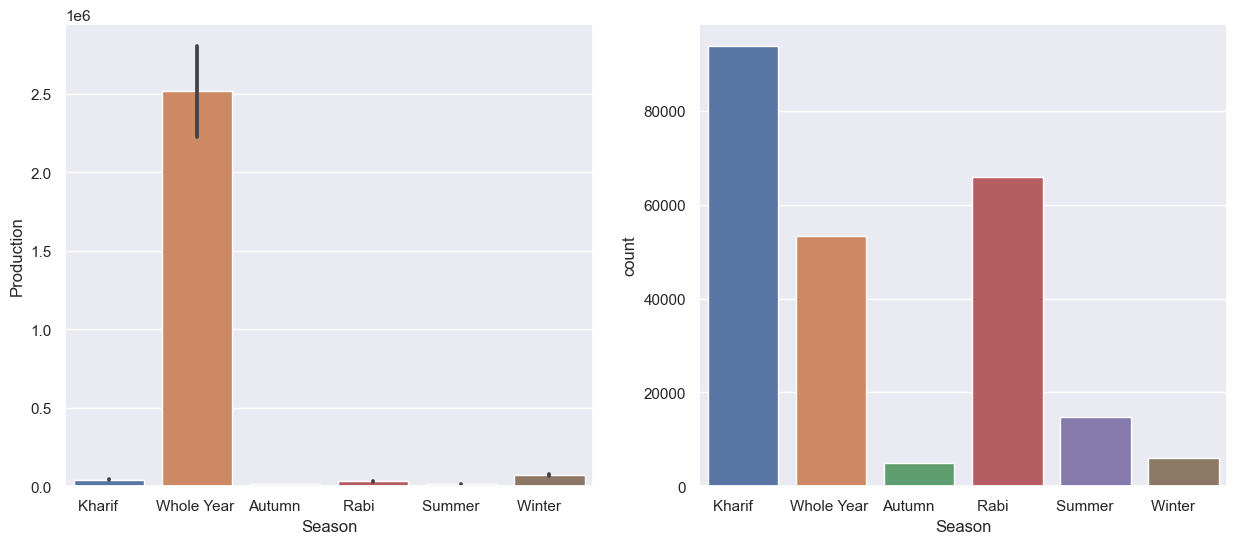

In [78]:
# plot that represents seasins with highest count
fig,ax = plt.subplots(1,2, figsize = (15,6))
sns.barplot(data=df,x='Season',y='Production', ax = ax[0])
sns.countplot(data=df,x='Season', ax = ax[1])


From the above plota we can deduce that eventhough Kharif season has highest count, the production is maximum in the Whole Year.

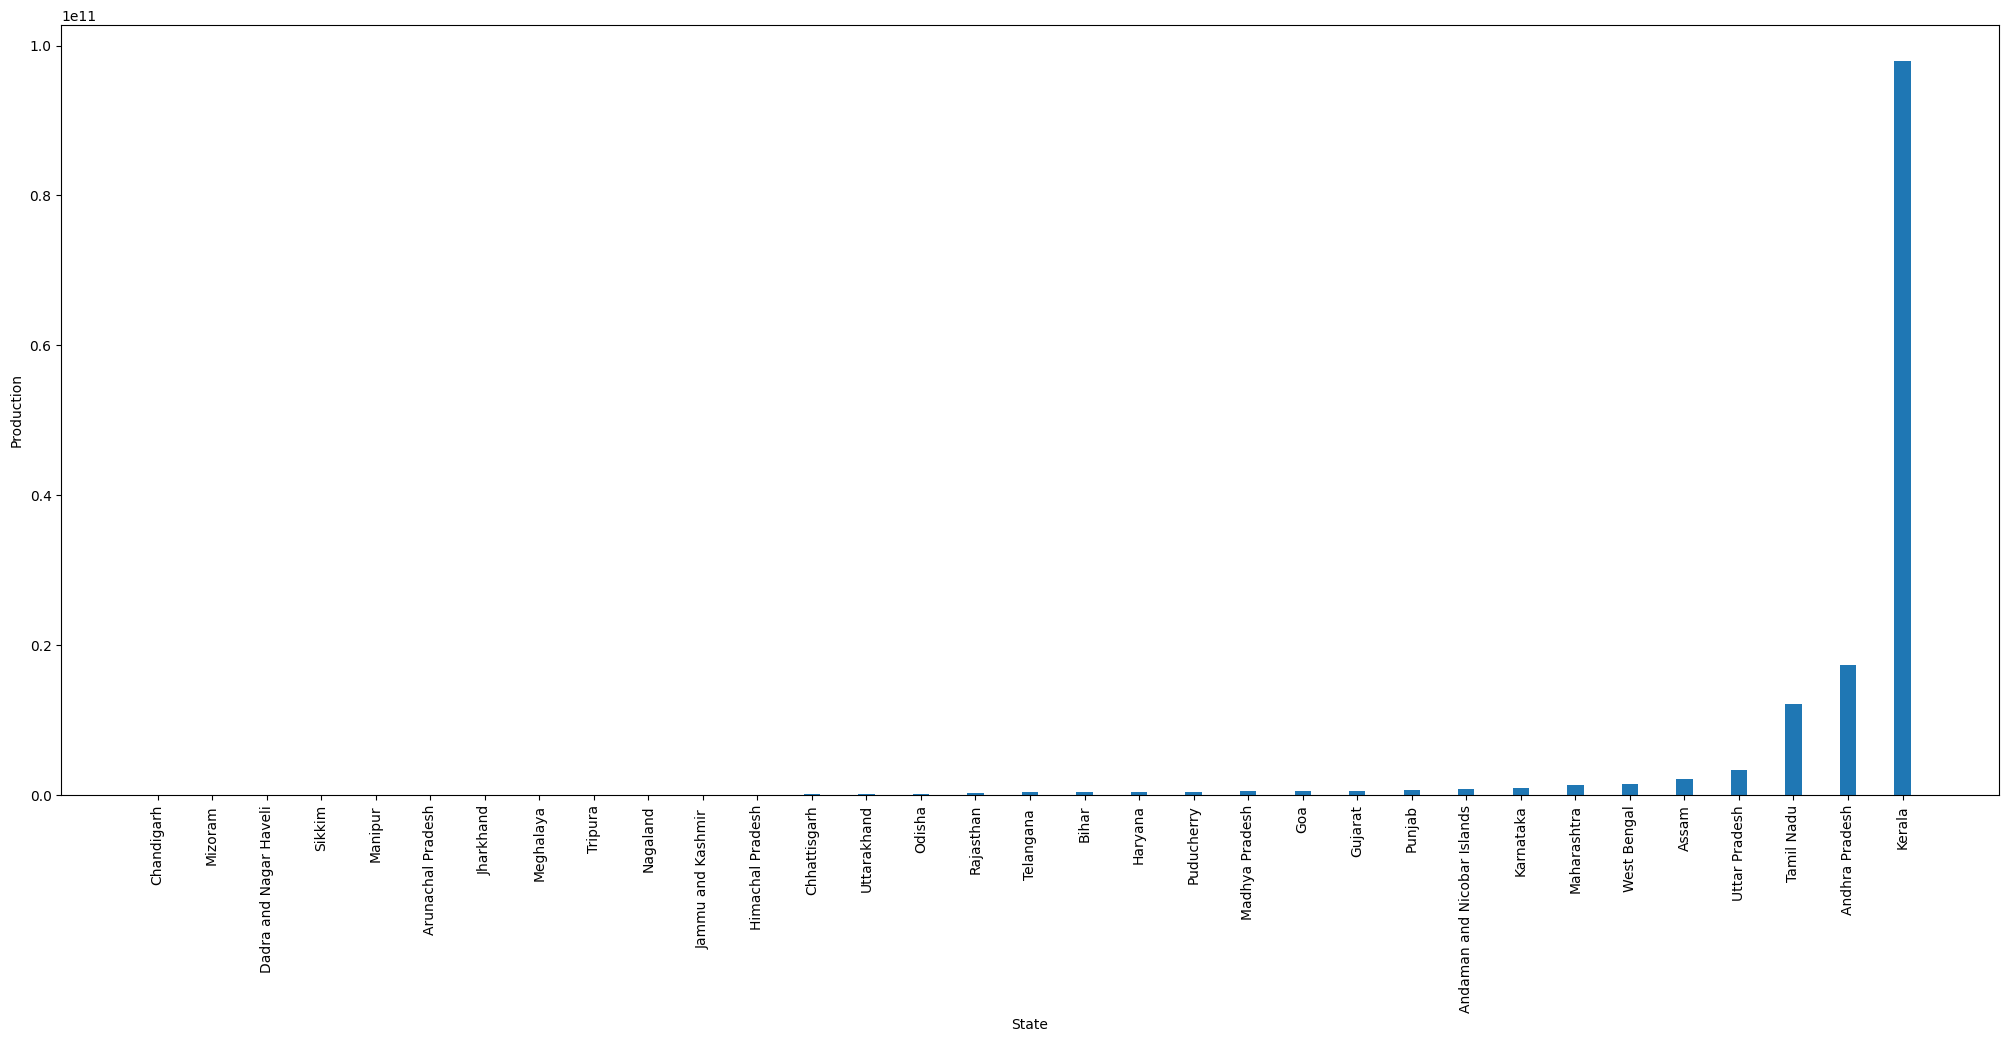

In [23]:
# A bar graph representing the state with highest production 
plt.figure(figsize=(25,10))
temp = df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')
plt.bar(temp['State_Name'], temp['Production'], width = 0.3)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Production")
plt.show()

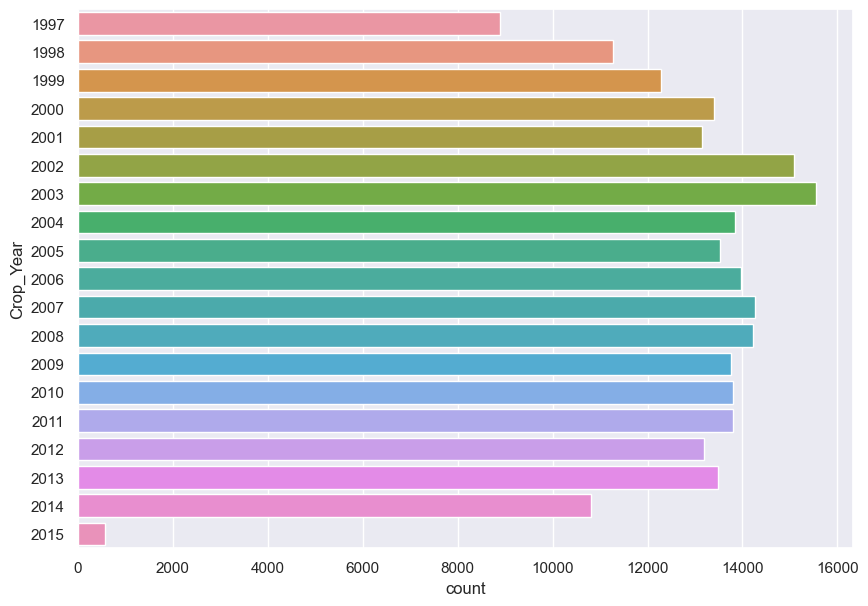

In [81]:
# Year with most crops were cultivated
plt.figure(figsize=(10,7))
sns.countplot(data=df,y='Crop_Year');   # Year 2003 has the most crops cultivated

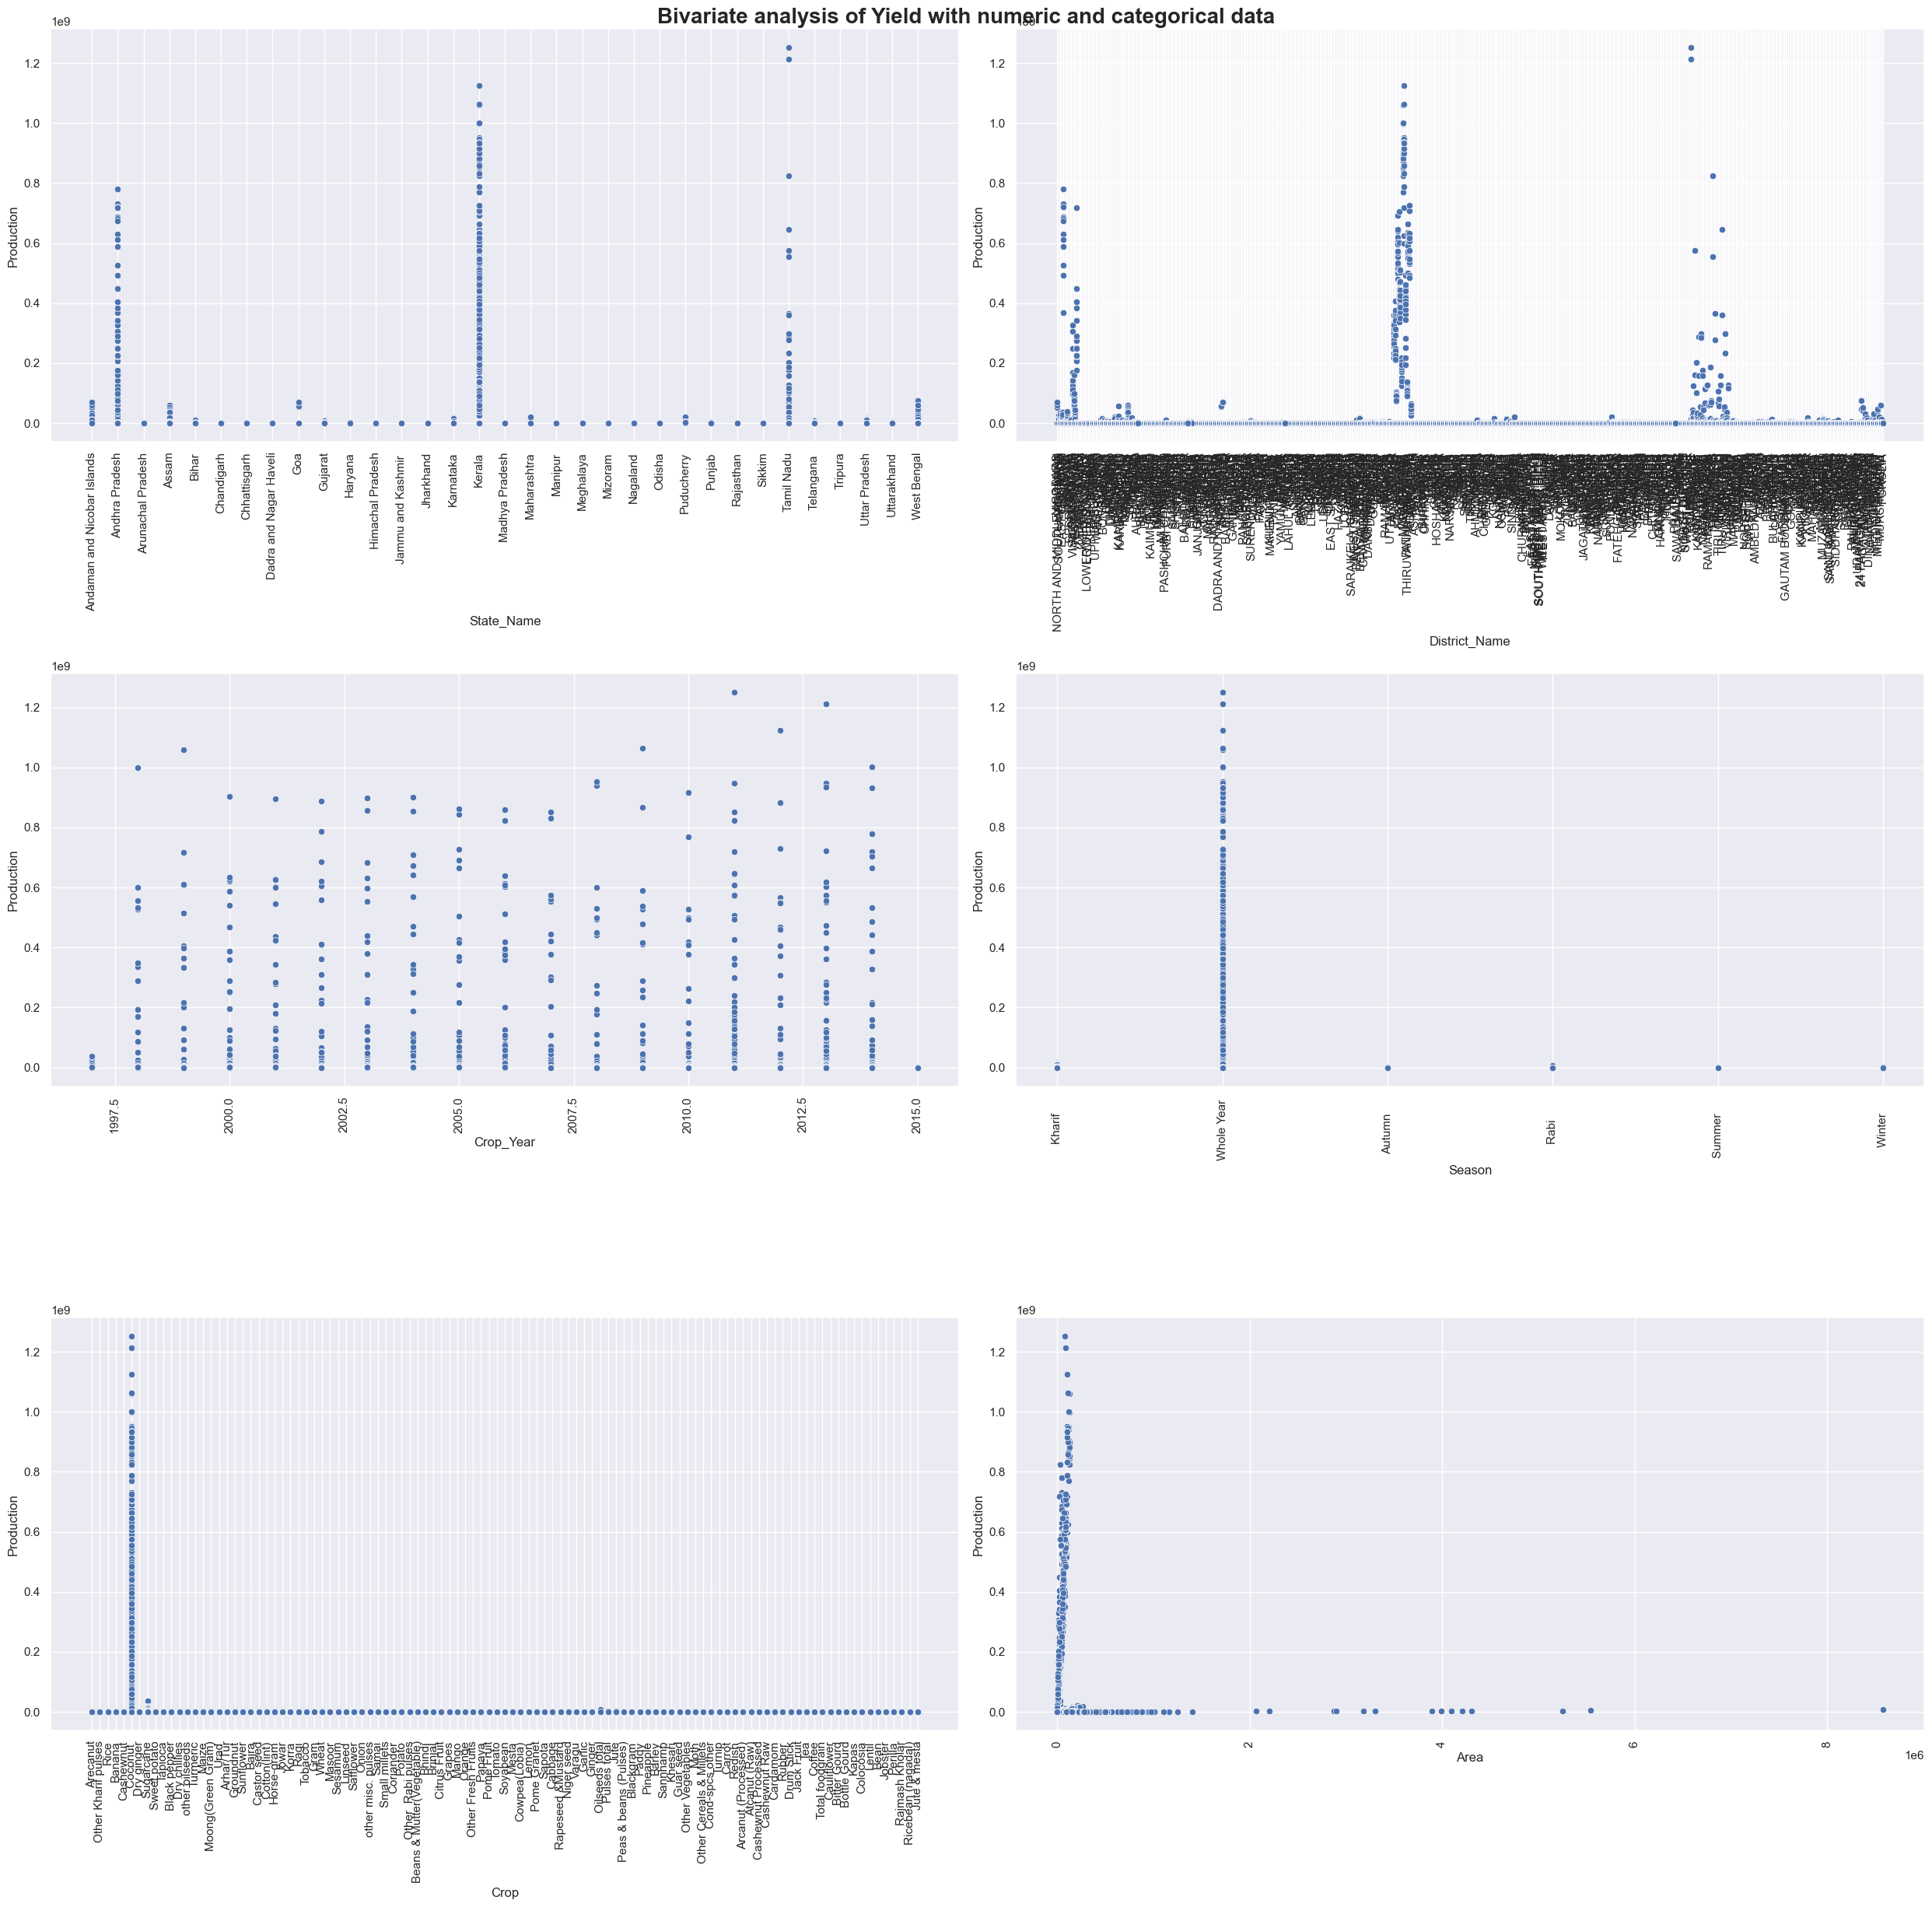

In [140]:
plt.figure(figsize=(25,25))
plt.suptitle("Bivariate analysis of Yield with numeric and categorical data",fontsize=20,fontweight='bold')
c = ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area']
for i in range(len(c)):
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=df[c[i]], y = df['Production'])
    plt.xlabel(c[i])
    plt.ylabel("Production")
    plt.xticks(rotation=90)
    plt.tight_layout()

The above plots show no linearity between the variables hence, linear regression, multiple linear and polynomial regression models are not considered for the analysis

C:\Users\Dell\AppData\Local\Temp\ipykernel_3172\3916702465.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


<AxesSubplot: >

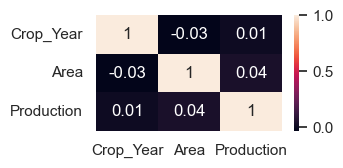

In [25]:
# Correlation map that shows the relation between every numerical columns in the dataframe
corr = df.corr().round(2)
sns.set (rc = {'figure.figsize':(3, 1.5)})
sns.heatmap(data = corr, annot = True)

The correlation heatmap shows that there is slight positive relation between the Area and Production given in the dataset

#  MODEL FOR THE DATASET Containing  State Wise Major Crop Production data

In [26]:
x1 = df[["District_Name","Season","Area","Production"]].values
a = df["District_Name"]
b= df["Season"].values
c= df["Area"].values
d = df["Production"].values
y1 = df["Crop"].values.reshape(-1,1)

In [27]:
# Encoding categorical values 
from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()
a = L.fit_transform(a)
b = L.fit_transform(b)
y1 = L.fit_transform(y1)
x1 = np.column_stack((a,b,c,d))


C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
x1.shape

(238838, 4)

In [29]:
# Splitting train and test data
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=42, test_size=0.3)
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(167186, 4)
(71652, 4)
(167186,)
(71652,)


## Decision tree Classifier Model

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x1_train, y1_train)

DecisionTreeClassifier()

In [33]:
dt_pred1 = dt_model1.predict(x1_test)

In [34]:
# Accuracy score of the model
from sklearn.metrics import accuracy_score
accuracy_score(y1_test, dt_pred1)

0.39634622899570143

In [35]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test, dt_pred1)

array([[   0,    2,    0, ...,    0,    0,    0],
       [   8,  218,    2, ...,    3,    0,    1],
       [   0,    1,  652, ...,    6,    0,   11],
       ...,
       [   0,    4,   13, ..., 1552,    0,    1],
       [   0,    0,    2, ...,    0,    3,    0],
       [   0,    0,    6, ...,    0,    0,   17]], dtype=int64)

## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
model_rf1 = RandomForestClassifier(n_estimators = 30)  #n_estimators- no of trees in the forest
model_rf1.fit(x1_train, y1_train)

RandomForestClassifier(n_estimators=30)

In [37]:
rf_pred1 = model_rf1.predict(x1_test)

In [38]:
c_rf1 = confusion_matrix(y1_test, rf_pred1)
#c_rf

In [39]:
# Accuracy
model_rf1.score(x1_test, y1_test)

0.4370847987495115

## KNN Model

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn_model1 = KNeighborsClassifier()
knn_model1.fit(x1_train, y1_train)

KNeighborsClassifier()

In [88]:
knn_pred1 = knn_model1.predict(x1_test)

In [89]:
c_knn1 = confusion_matrix(y1_test, knn_pred1)
c_knn1

array([[  0,   0,   0, ...,   0,   0,   0],
       [  6, 108,  49, ...,   4,   0,   0],
       [  1,  48, 577, ...,  11,   0,   4],
       ...,
       [  2,  21, 115, ..., 529,   0,   0],
       [  0,   0,   1, ...,   0,   0,   0],
       [  0,   3,  23, ...,   2,   0,  11]], dtype=int64)

In [91]:
knn_model1.score(x1_test, y1_test)

0.21429967063026853

## Support Vector Machine 

In [ ]:
from sklearn.svm import SVC
model_svc1 = SVC()
model_svc1.fit(x1_train, y1_train)


In [ ]:
pred_svc1 = model_svc1.predict(x1_test)

# Ideal value of pH for various crops

In [96]:
#Ideal value of pH for various crops
df_ph =  pd.read_csv(r"C:\Users\Dell\Downloads\cropph.csv")

In [98]:
df_ph.head()

,Crop,Ph
0,Bajra,3.0
1,Banana,6.5
2,Barley,3.0
3,Bean,5.5
4,Black pepper,6.4


In [108]:
df_ph.columns

Index(['Crop', ' Ph'], dtype='object')

In [99]:
df_ph.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crop    58 non-null     object 
 1    Ph     58 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


# EDA for df_ph 

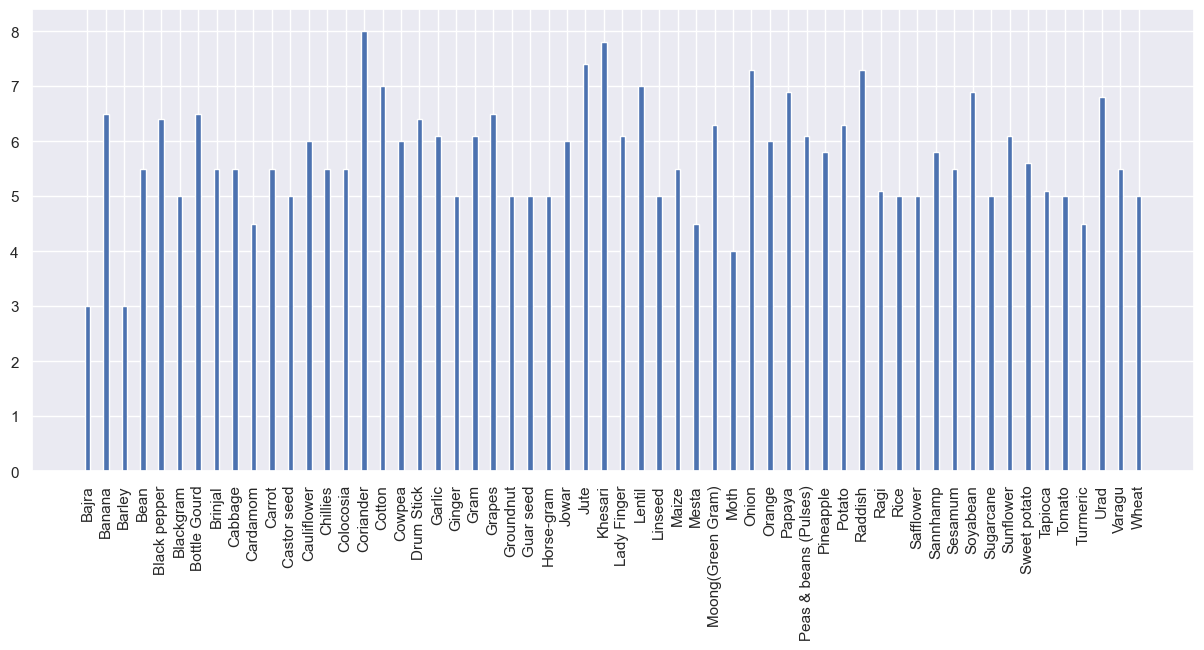

In [114]:
# Ideal ph for each crops 
plt.figure(figsize=(15,6))
plt.bar( df_ph["Crop"],df_ph[" Ph"], width = 0.3)
plt.xticks(rotation = 90)
plt.show()

# State Wise Cost of Production

In [11]:
#State Wise Cost of Production
df_statewise_cost = pd.read_csv(r"C:\Users\Dell\Downloads\state_wise_crop_production.csv")

In [115]:
df_statewise_cost.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [12]:
df_statewise_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [147]:
df_statewise_cost.describe()

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
count,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,31364.666735,1620.537755,98.086735
std,13561.435306,20095.783569,1104.990472,245.293123
min,5483.540000,7868.640000,85.790000,1.320000
25%,12774.410000,19259.840000,732.620000,9.590000
50%,17022.000000,25909.050000,1595.560000,13.700000
75%,24731.060000,35423.480000,2228.970000,36.610000
max,66335.060000,91442.630000,5777.480000,1015.450000


# Actual Crop Yield based on Various Factors

In [13]:
#Actual Crop Yield based on Various Factors
df_yield = pd.read_csv(r"C:\Users\Dell\Downloads\cropproductiononvariousfactors.csv")

In [117]:
df_yield.head()

,Rainfall,Temperature,Ph,Crop,Production,Cropconversion
0,400.15082,20.0,3.0,Bajra,0.00690,Bajra
1,400.16331,20.0,3.2,Bajra,0.00747,Bajra
2,400.16387,20.0,3.2,Bajra,0.00749,Bajra
3,400.17967,20.0,3.2,Bajra,0.00822,Bajra
4,400.19582,20.0,3.2,Bajra,0.00895,Bajra


In [118]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189232 entries, 0 to 189231
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Rainfall        189232 non-null  float64
 1   Temperature     189232 non-null  float64
 2   Ph              189232 non-null  float64
 3   Crop            189232 non-null  object 
 4   Production      189232 non-null  float64
 5   Cropconversion  189232 non-null  object 
dtypes: float64(4), object(2)
memory usage: 8.7+ MB


In [135]:
df1 = df_yield["Crop"].unique()
df2 = df_yield["Cropconversion"].unique()
df3 = pd.DataFrame(df1,df2)

In [136]:
df_yield.drop("Cropconversion", axis= 1, inplace = True)

In [137]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189232 entries, 0 to 189231
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Rainfall     189232 non-null  float64
 1   Temperature  189232 non-null  float64
 2   Ph           189232 non-null  float64
 3   Crop         189232 non-null  object 
 4   Production   189232 non-null  float64
dtypes: float64(4), object(1)
memory usage: 7.2+ MB


In [142]:
df_yield.describe()

,Rainfall,Temperature,Ph,Production
count,189232.000000,189232.000000,189232.000000,189232.000000
mean,693.417573,25.262492,6.337846,5.262677
std,288.988419,4.585660,0.788959,14.441616
min,100.003400,7.000000,3.000000,0.000340
25%,516.000000,22.026830,5.800000,0.584420
50%,628.702885,25.000000,6.300000,1.166670
75%,770.000000,28.215000,6.900000,2.989630
max,3000.000000,39.045000,8.800000,955.750340


# EDA for Crop Yield based on Various Factors(df_yiels) 

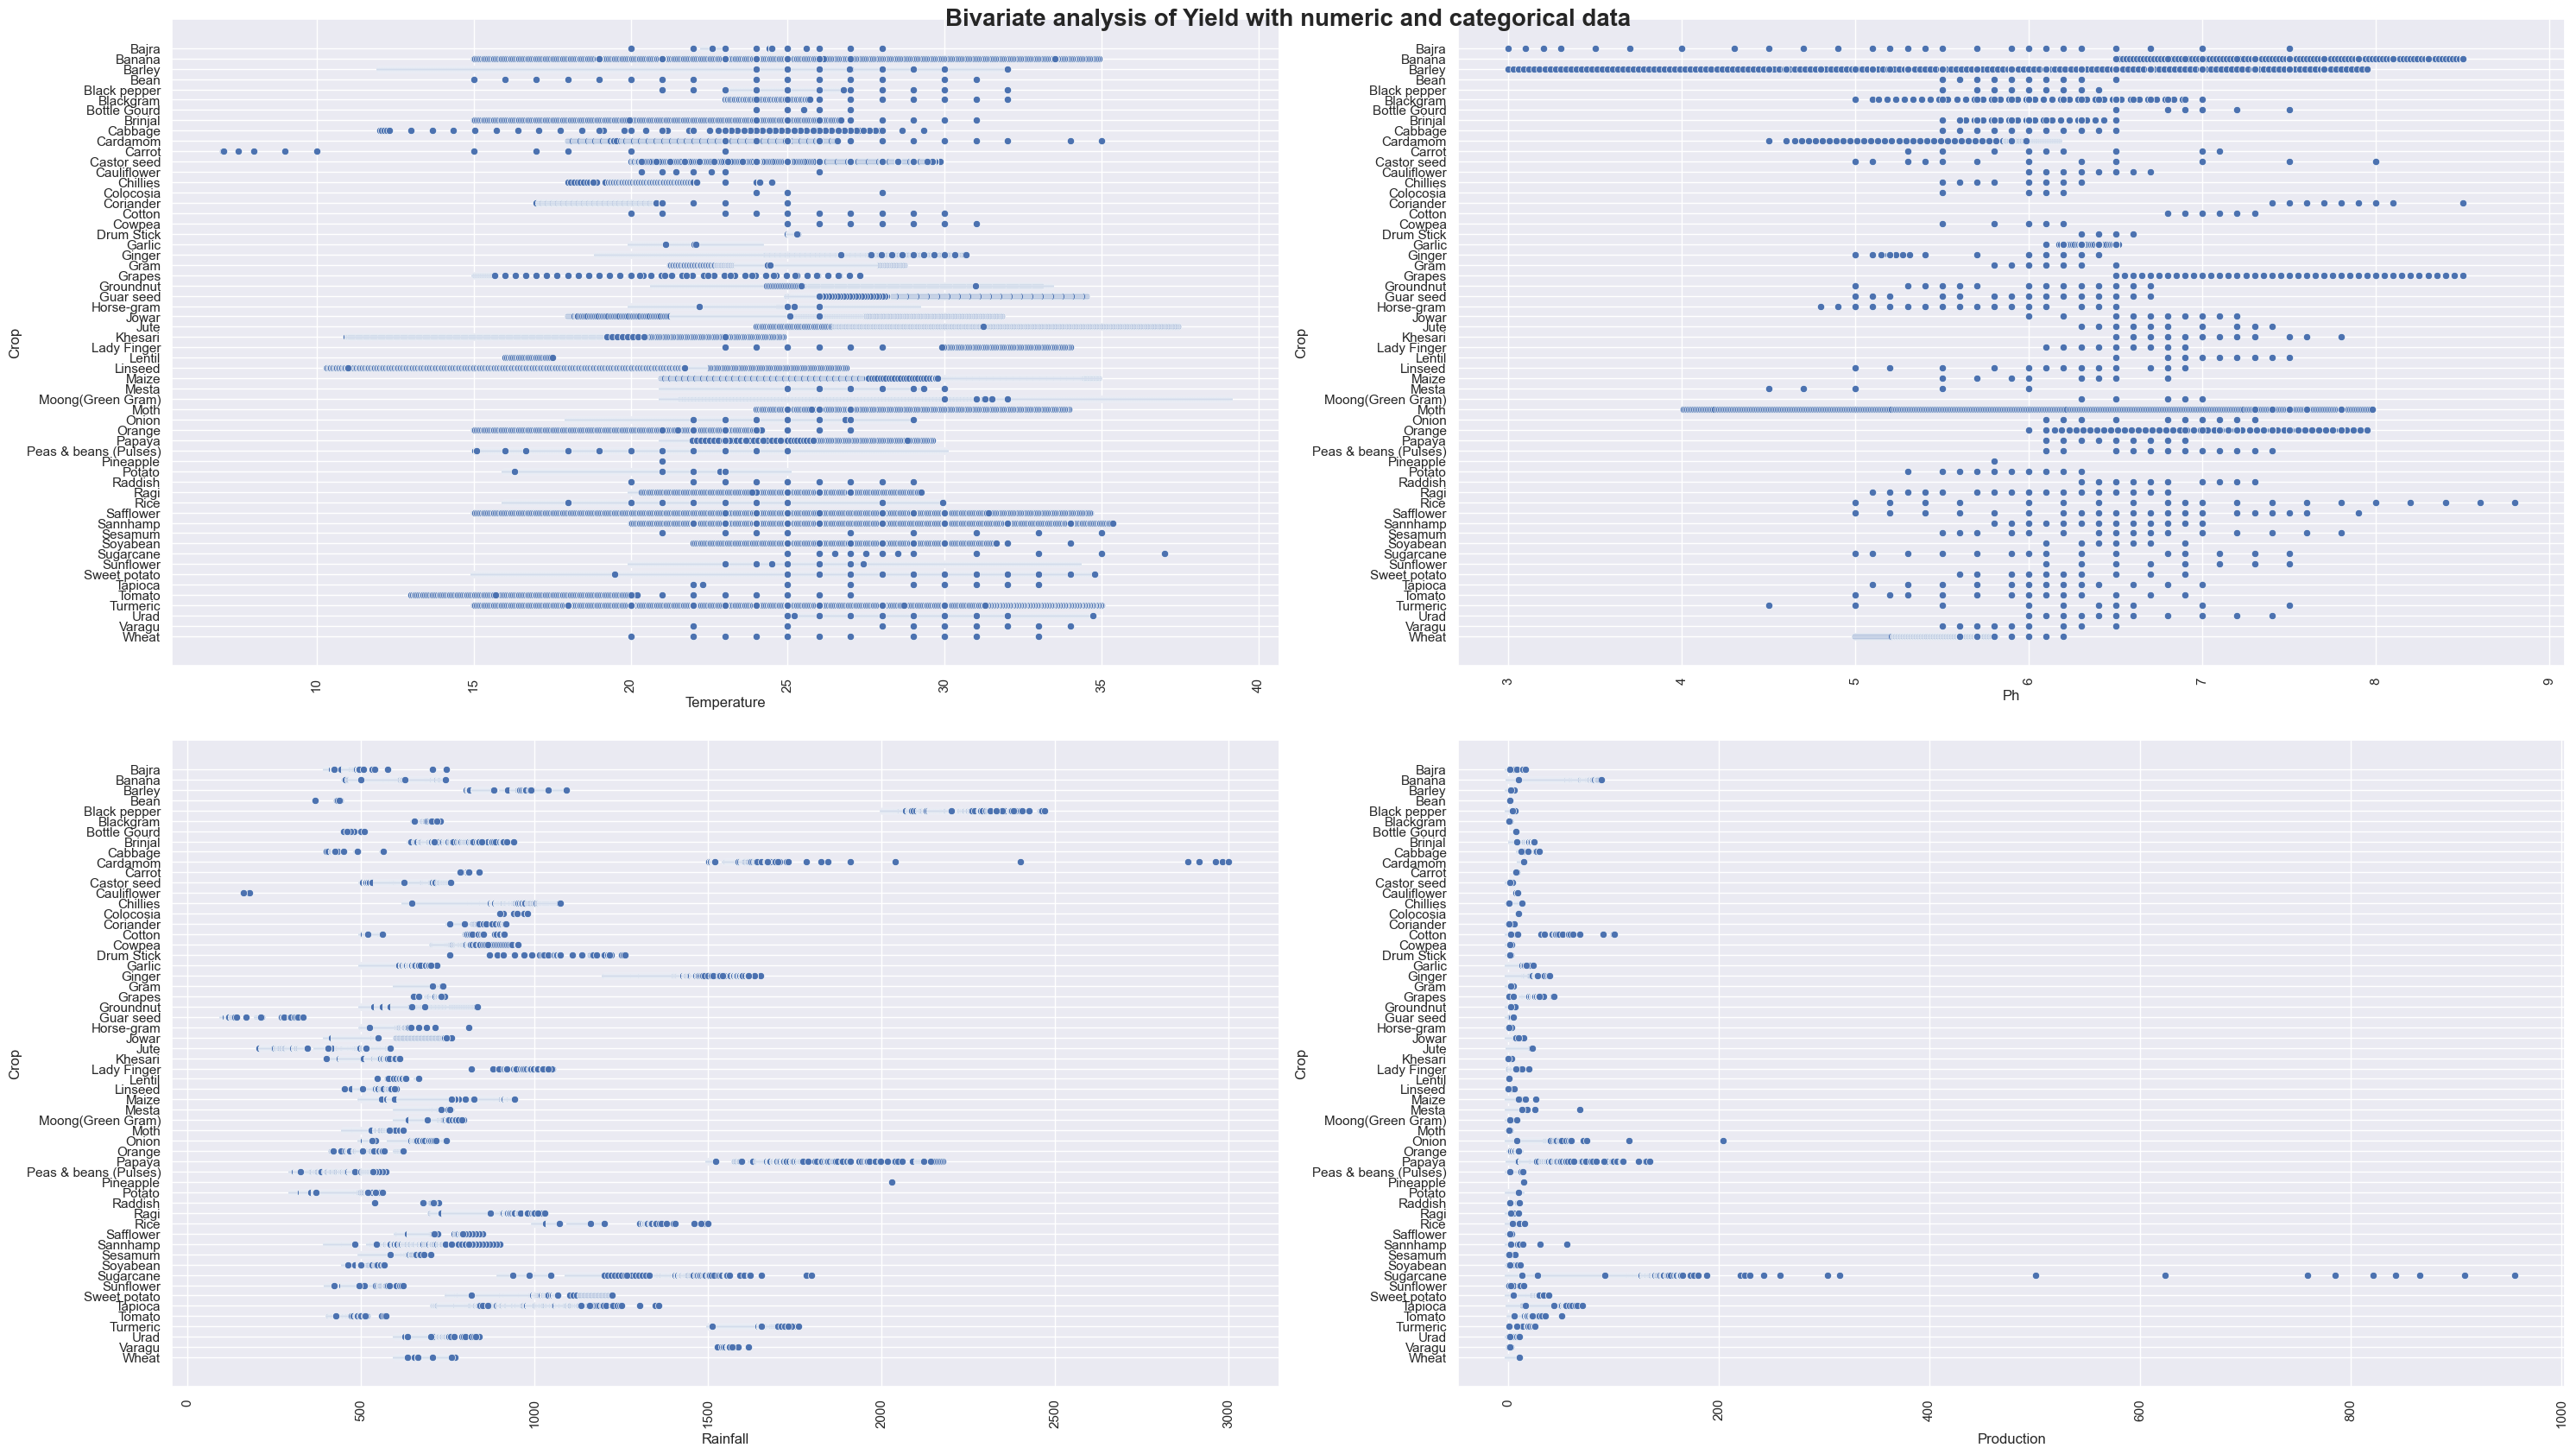

In [154]:
# Scatter plot for crop versus dependent variables to checkits relation with them.
plt.figure(figsize=(30,25))
plt.suptitle("Bivariate analysis of Yield with numeric and categorical data",fontsize=20,fontweight='bold')
c = ['Temperature', 'Ph', 'Rainfall', "Production"]
for i in range(len(c)):
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=df_yield[c[i]], y = df_yield['Crop'])
    plt.xlabel(c[i])
    plt.ylabel("Crop")
    plt.xticks(rotation=90)
    plt.tight_layout()

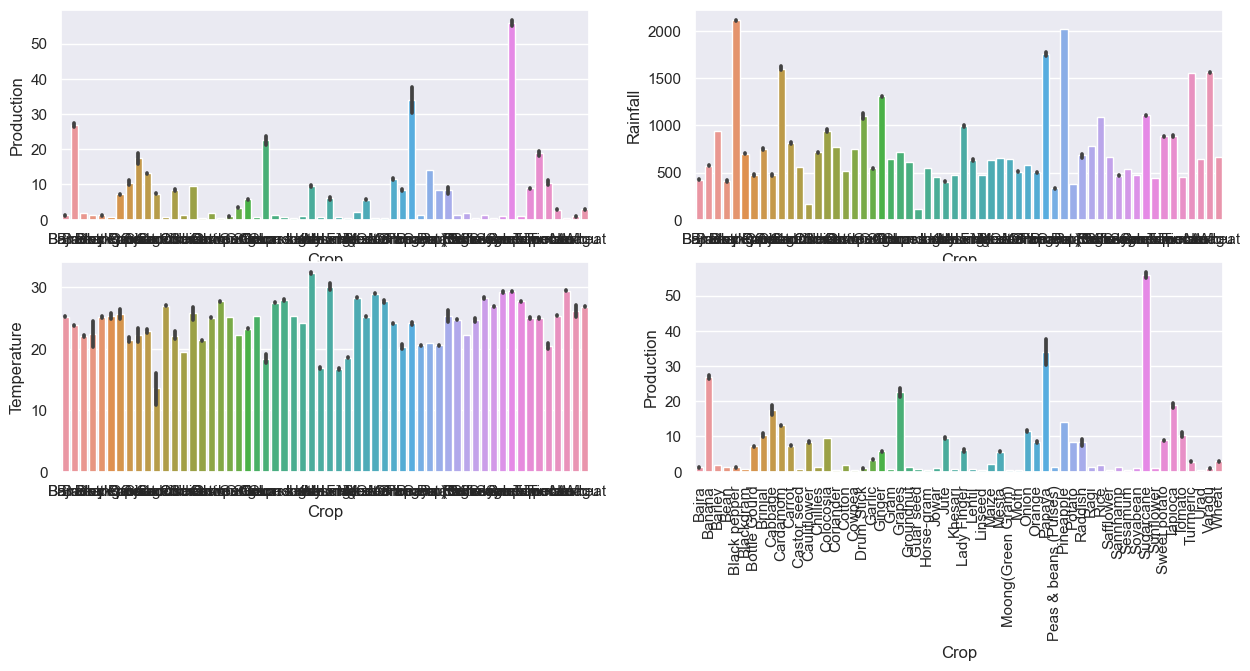

In [155]:
fig,ax = plt.subplots(2,2, figsize = (15,6))
sns.barplot(data=df_yield,x='Crop',y='Production', ax = ax[0,0])
sns.barplot(data=df_yield,x='Crop',y ="Rainfall", ax = ax[0,1])
sns.barplot(data=df_yield,x='Crop',y ="Temperature", ax = ax[1,0])
sns.barplot(data=df_yield,x='Crop',y ="Production", ax = ax[1,1])
plt.xticks(rotation= 90)
plt.show()

# Crop Dependence on Various Factors

In [15]:
# Crop Dependence on Various Factors:
df_factors  = pd.read_csv(r"C:\Users\Dell\Downloads\cpdata.csv")

In [16]:
df_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3100 non-null   float64
 1   humidity     3100 non-null   float64
 2   ph           3100 non-null   float64
 3   rainfall     3100 non-null   float64
 4   label        3100 non-null   object 
dtypes: float64(4), object(1)
memory usage: 121.2+ KB


In [30]:
#df = df.join(pd.get_dummies(df["State_Name"]))
#df = df.join(pd.get_dummies(df["Season"]))
#df = df.join(pd.get_dummies(df["Crop"]))


In [31]:
#df["Yield"] = df["Production"]/df["Area"]

# EDA for df_Factors

In [40]:
df_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3100 non-null   float64
 1   humidity     3100 non-null   float64
 2   ph           3100 non-null   float64
 3   rainfall     3100 non-null   float64
 4   label        3100 non-null   object 
dtypes: float64(4), object(1)
memory usage: 121.2+ KB


In [120]:
df_factors.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


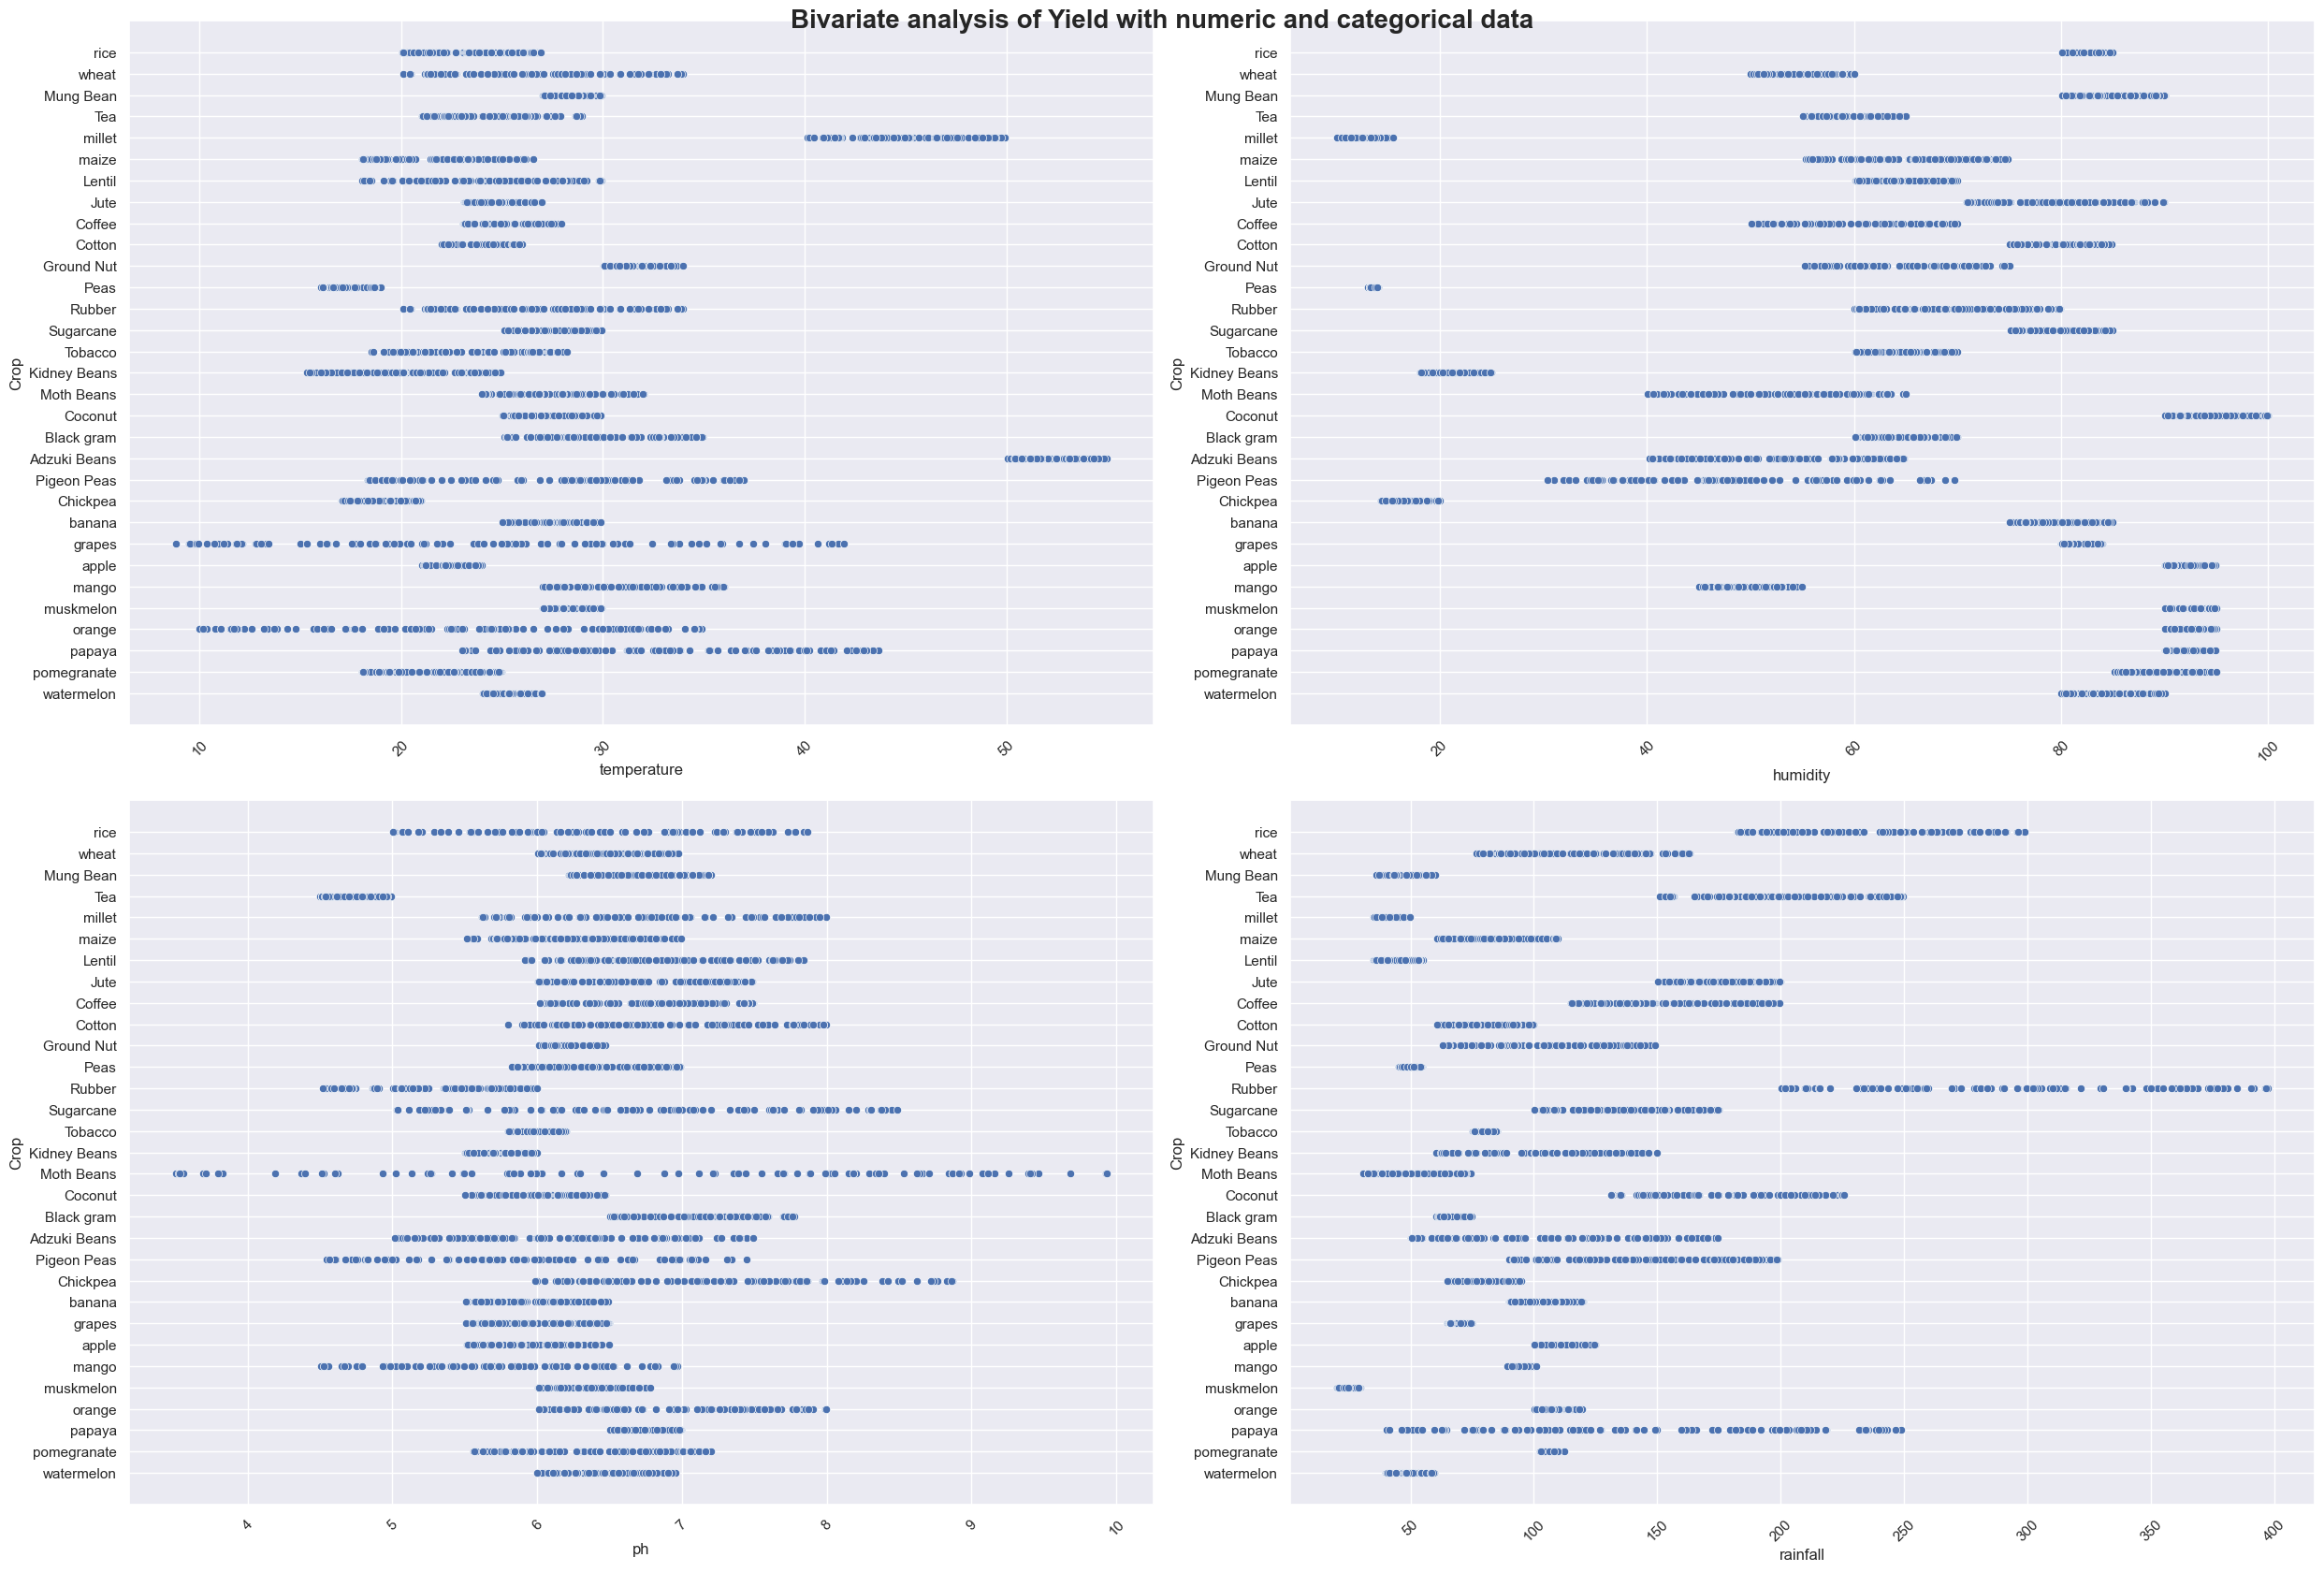

In [122]:
plt.figure(figsize=(25,25))
plt.suptitle("Bivariate analysis of Yield with numeric and categorical data",fontsize=20,fontweight='bold')
c = ['temperature', 'humidity', 'ph', 'rainfall']
for i in range(len(c)):
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=df_factors[c[i]], y = df_factors['label'])
    plt.xlabel(c[i])
    plt.ylabel("Crop")
    plt.xticks(rotation=45)
    plt.tight_layout()

C:\Users\Dell\AppData\Local\Temp\ipykernel_3172\3189447563.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = df_factors.corr().round(2)


<AxesSubplot: >

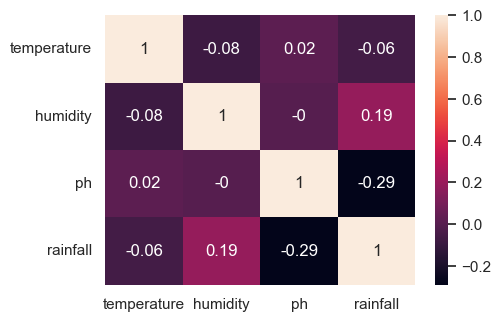

In [41]:
corr1 = df_factors.corr().round(2)
sns.set (rc = {'figure.figsize':(5, 3.5)})
sns.heatmap(data = corr1, annot = True)

<AxesSubplot: xlabel='rainfall', ylabel='label'>

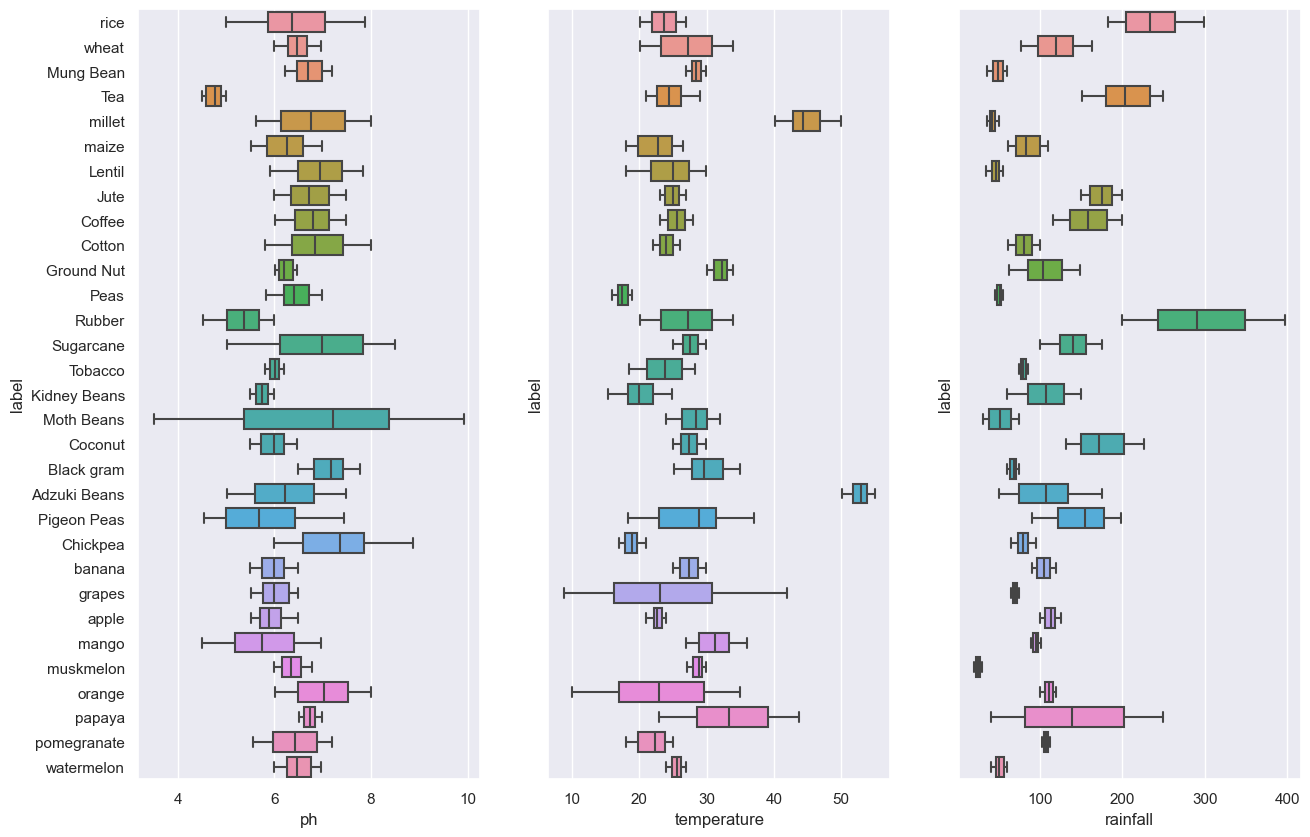

In [44]:
# Visualising the effect of factors  on crop

fig,ax = plt.subplots(1,3, figsize = (15,10), sharey = True)
sns.boxplot(y='label',x='ph',data=df_factors, ax =ax [0])
sns.boxplot(y='label',x='temperature',data=df_factors, ax = ax[1]) 
sns.boxplot(y='label',x='rainfall',data=df_factors, ax = ax[2]) 

# MODEL FOR THE DATASET CONTAINING Crop Dependence on Various Factors

Splitting data into dependent and independent variables

In [42]:
x = df_factors[["temperature","humidity","ph","rainfall"]].values
x.shape

(3100, 4)

In [43]:
y = df_factors["label"].values.reshape(-1,1)
y.shape

(3100, 1)

In [45]:
# Encoding categorical values 
from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()
y = L.fit_transform(y)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
y

array([28, 28, 28, ..., 29, 29, 29])

In [47]:
# Splitting train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2170, 4)
(930, 4)
(2170,)
(930,)


## Decision tree Classifier Model

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
# Testing
dt_pred = dt_model.predict(x_test)
#dt_pred

In [50]:
# Accuracy score of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt_pred)

0.9139784946236559

In [51]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, dt_pred)

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 15)  #n_estimators- no of trees in the forest = 15 has got highest accuracy 
model_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15)

In [53]:
rf_pred = model_rf.predict(x_test)

In [54]:
c_rf = confusion_matrix(y_test, rf_pred)
#c_rf

In [129]:
# Accuracy
model_rf.score(x_test, y_test)

0.9333333333333333

In [130]:
from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_pred)
print("R2 score : ",r1)

R2 score :  0.8692725133118158


## KNN Model

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [57]:
knn_pred = knn_model.predict(x_test)

In [58]:
c_knn = confusion_matrix(y_test, knn_pred)
c_knn

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,
         3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5],
       [ 0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  3,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5],
       [ 0,  

In [59]:
knn_model.score(x_test, y_test)

0.8290322580645161

**Random Forest has the highest accuracy of 93%**

 # **Testing the models**

In [60]:
test_data = np.array([[ 43, 13, 7.8, 40.935]])
test_data

array([[43.   , 13.   ,  7.8  , 40.935]])

In [61]:
dt_model.predict(test_data)

array([23])

In [62]:
model_rf.predict(test_data)

array([23])

In [63]:
knn_model.predict(test_data)

array([23])

In [64]:
df_factors[150:500]

,temperature,humidity,ph,rainfall,label
150,26.449104,51.150431,6.364014,85.877187,wheat
151,25.152724,51.547671,6.092066,100.062997,wheat
152,22.153676,58.343183,6.624886,105.758683,wheat
153,22.162696,58.907416,6.540173,103.417183,wheat
154,25.991832,52.618990,6.602463,124.917268,wheat
...,...,...,...,...,...
495,43.520387,13.267184,7.154693,40.102623,millet
496,47.035389,11.845305,7.808002,41.314432,millet
497,48.446546,10.887599,5.803526,38.520774,millet
498,46.500389,12.441505,7.686214,47.055513,millet


In [65]:
y[495:500]

array([23, 23, 23, 23, 23])

**All the above models predict the data accurately. So by knowing the environmental condition any of state, we can easily recommend the type of crop the farmers should grow for maximum profit and effeciency.**